In [1]:
""" 
PROGRAM :  diagnostics_basics.ipynb 

reads in PP assimilation runs, historical simulations 
and raw forecasts under CMIP6 emissions 
to produce some basic diagnostics

STATUS  : Complete 
COMMENTS: (1) No adjusted forecast shown here
"""

' \nPROGRAM :  diagnostics_basics.ipynb \n\nreads in PP assimilation runs, historical simulations \nand raw forecasts under CMIP6 emissions \nto produce some basic diagnostics\n\nSTATUS  : Complete \nCOMMENTS: (1) No adjusted forecast shown here\n'

In [2]:
import warnings
warnings.filterwarnings('ignore')

from module_data_info import data_module_pp, biomes_module, data_module_chl
from module_data_locations import *
from module_data_load import load_data, load_ensemble, load_biomes
from module_data_preprocessing import * 
from module_data_postprocessing import * 
from module_global_averages import * 
from module_metrics import *
from module_plot_lines import *
from module_plot_maps  import *
from module_plot_bars  import plot_bars

In [72]:

unit_change_PP = 12 * 1000 * 60*60*24 # mol m-2 s-1 (CanESM5)--> mg m-2 d-1
unit_change_CHL = 1000000 # CMIP6 units --> units
unit_change = unit_change_PP/unit_change_CHL
units = r'mg C m$^{-2}$ d$^{-1}$ / CHL' # ???

In [4]:
def nanmasker(ds, dim = 'time', return_mask = False):
    mask = ds.isnull().sum(dim=dim)/len(ds[dim])
    if return_mask:
        return ds * xr.ones_like(mask).where(mask<0.2, np.nan), xr.ones_like(mask).where(mask<0.2, np.nan)
    else:
        return ds * xr.ones_like(mask).where(mask<0.2, np.nan)



In [5]:
print(dir_forecasts_pp)
print(dir_observations_pp)
print(dir_assimilations_pp)
print(dir_simulations_pp)


print(dir_forecasts_chl)
print(dir_observations_chl)
print(dir_assimilations_chl)
print(dir_simulations_chl)
print(dir_biomes_chl)

/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/intpp/forecast
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/intpp/observations
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/intpp/assimilation
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/intpp/simulation
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/chlos/forecast
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/chlos/observations
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/chlos/assimilation
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/chlos/simulation
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/biomes


In [6]:
obs_info_pp = data_module_pp(dir_observations_pp)
hnd_info_pp = data_module_pp(dir_forecasts_pp)
asm_info_pp = data_module_pp(dir_assimilations_pp)
sim_info_pp = data_module_pp(dir_simulations_pp)

obs_info_pp.PrintLoc()
hnd_info_pp.PrintLoc()
asm_info_pp.PrintLoc()
sim_info_pp.PrintLoc()



obs_info_chl = data_module_chl(dir_observations_chl)
hnd_info_chl = data_module_chl(dir_forecasts_chl)
asm_info_chl = data_module_chl(dir_assimilations_chl)
sim_info_chl = data_module_chl(dir_simulations_chl)
bms_info = biomes_module(dir_biomes_chl)
obs_info_chl.PrintLoc()
hnd_info_chl.PrintLoc()
asm_info_chl.PrintLoc()
sim_info_chl.PrintLoc()
bms_info.PrintLoc()



/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/intpp/observations
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/intpp/forecast
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/intpp/assimilation
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/intpp/simulation
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/chlos/observations
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/chlos/forecast
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/chlos/assimilation
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/chlos/simulation
/space/hall5/sitestore/eccc/crd/ccrn/users/rsa001/big_store/AI/FGCO2/data/biomes


In [7]:
iname = 1 - 1
obs_names_pp = ['ESACCI']  # updated to 2021
obs_name_pp = obs_names_pp[iname]

obs_dict_pp = obs_info_pp.data_dict[obs_name_pp]
asm_dict_pp = asm_info_pp.data_dict['asm']
sim_dict_pp = sim_info_pp.data_dict['sim']
hnd_dict_pp = hnd_info_pp.data_dict['hnd']

obs_dir_pp  = obs_dict_pp['dir']
obs_file_pp = obs_dict_pp['file']

asm_dir_pp  = asm_dict_pp['dir']
asm_file_pp = asm_dict_pp['file']

sim_dir_pp  = sim_dict_pp['dir']
sim_file_pp = sim_dict_pp['file']

hnd_dir_pp  = hnd_dict_pp['dir']
hnd_file_pp = hnd_dict_pp['file']


iname = 1 - 1
obs_names_chl = ['ESACCI']  # updated to 2021
obs_name_chl = obs_names_chl[iname]

obs_dict_chl = obs_info_chl.data_dict[obs_name_chl]
asm_dict_chl = asm_info_chl.data_dict['asm']
sim_dict_chl = sim_info_chl.data_dict['sim']
hnd_dict_chl = hnd_info_chl.data_dict['hnd']

obs_dir_chl  = obs_dict_chl['dir']
obs_file_chl = obs_dict_chl['file']

asm_dir_chl  = asm_dict_chl['dir']
asm_file_chl = asm_dict_chl['file']

sim_dir_chl  = sim_dict_chl['dir']
sim_file_chl = sim_dict_chl['file']

hnd_dir_chl  = hnd_dict_chl['dir']
hnd_file_chl = hnd_dict_chl['file']





In [8]:
bms_dict = bms_info.data_dict['biomes']
bms_dir  = bms_dict['dir']
bms_file = bms_dict['file']
bms_dict_plot = bms_info.dict_biomes_plot

In [9]:
verbose = True
if verbose:
    print(obs_dir_chl)
    print(hnd_dir_chl)
    print(asm_dir_chl)
    print(sim_dir_chl)

    print(obs_dir_pp)
    print(hnd_dir_pp)
    print(asm_dir_pp)
    print(sim_dir_pp)

/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/chlos/observations/ESACCI/ESACCI-1M_MONTHLY_1x1_199801-202403.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/chlos/forecast
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/chlos/assimilation/chlos_Omon_ensmebles_195801_202312_1x1_LE.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/chlos/simulation/chlos_Omon_historical_1982_2024_1x1_LE.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/intpp/observations/cafe_global_1deg_2002_2006.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/intpp/forecast
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/intpp/assimilation/intpp_Omon_ensmebles_195801_202012_1x1_LE.nc
/space/hall5/sitestore/eccc/crd/ccrn/users/rpg002/data/intpp/simulation/intpp_Omon_ensmebles_198001_201412_1x1_LE.nc


In [10]:
varx     = 'ppductivity per chl'
mdl_set  = 'canesm5'   
ensemble_mean = True

In [11]:
dir_out = f'{dir_output_pp}/{obs_name_chl}/results/00_Diagnostics/Basics'

In [12]:
y0_obs_chl = obs_dict_chl['y0'] # ini year avaliable obs
y1_obs_chl = obs_dict_chl['y1'] # end year avaliable obs 

y0_raw_chl = hnd_dict_chl['y0'] # ini year avaliable predictions
y1_raw_chl = hnd_dict_chl['y1'] # end year avaliable predictions

y0_asm_chl = asm_dict_chl['y0'] # ini year avaliable assimilation runs
y1_asm_chl = asm_dict_chl['y1'] # end year avaliable assimilation runs

y0_sim_chl = sim_dict_chl['y0'] # ini year avaliable simulations
y1_sim_chl = sim_dict_chl['y1'] # ini year avaliable simulations

y0_obs_pp = obs_dict_pp['y0'] # ini year avaliable obs
y1_obs_pp = obs_dict_pp['y1'] # end year avaliable obs 

y0_raw_pp = hnd_dict_pp['y0'] # ini year avaliable predictions
y1_raw_pp = hnd_dict_pp['y1'] # end year avaliable predictions

y0_asm_pp = asm_dict_pp['y0'] # ini year avaliable assimilation runs
y1_asm_pp = asm_dict_pp['y1'] # end year avaliable assimilation runs

y0_sim_pp = sim_dict_pp['y0'] # ini year avaliable simulations
y1_sim_pp = sim_dict_pp['y1'] # ini year avaliable simulations



y0_base = 2002          # initial year for base period to compute anomalies
y1_base = 2006          # end     year for base period to compute anomalies

y0_show = 2002            # first initial to show
y1_show = 2006            # last  initial to show

In [13]:
verbose = True
if verbose:
    print("======")
    print(f"y0_obs_chl : {y0_obs_chl}")
    print(f"y1_obs_chl : {y1_obs_chl}")
    print("======")
    print(f"y0_raw_chl : {y0_raw_chl}")
    print(f"y1_raw_chl : {y1_raw_chl}")
    print("======")
    print(f"y0_asm_chl : {y0_asm_chl}")
    print(f"y1_asm_chl : {y1_asm_chl}")
    print("======")
    print(f"y0_sim_chl : {y0_sim_chl}")
    print(f"y1_sim_chl : {y1_sim_chl}")
    print("======")
    print(f"y0_obs_pp : {y0_obs_pp}")
    print(f"y1_obs_pp : {y1_obs_pp}")
    print("======")
    print(f"y0_raw_pp : {y0_raw_pp}")
    print(f"y1_raw_pp : {y1_raw_pp}")
    print("======")
    print(f"y0_asm_pp : {y0_asm_pp}")
    print(f"y1_asm_pp : {y1_asm_pp}")
    print("======")
    print(f"y0_sim_pp : {y0_sim_pp}")
    print(f"y1_sim_pp : {y1_sim_pp}")
    print("======")
    print(f"y0_base: {y0_base}")
    print(f"y1_base: {y1_base}")
    print("======")
    print(f"y0_show: {y0_show}")
    print(f"y1_show: {y1_show}")
    print("======")

y0_obs_chl : 1998
y1_obs_chl : 2024
y0_raw_chl : 1998
y1_raw_chl : 2024
y0_asm_chl : 1958
y1_asm_chl : 2024
y0_sim_chl : 1982
y1_sim_chl : 2024
y0_obs_pp : 2002
y1_obs_pp : 2006
y0_raw_pp : 1999
y1_raw_pp : 2020
y0_asm_pp : 1958
y1_asm_pp : 2020
y0_sim_pp : 1980
y1_sim_pp : 2014
y0_base: 2002
y1_base: 2006
y0_show: 2002
y1_show: 2006


In [45]:
hnd_in_pp = load_ensemble(dir_forecasts_pp,'intpp',y0_show,y1_show,ensemble_mean=ensemble_mean)
                                                                        
hnd_in_chl = load_ensemble(dir_forecasts_chl,'chlos',y0_show,y1_show,ensemble_mean=ensemble_mean)     

hnd_in = unit_change * hnd_in_pp / hnd_in_chl

del hnd_in_chl
del hnd_in_pp
                        
hnd_in, model_mask = nanmasker(hnd_in, return_mask= True)

loading forecasts..
done
loading forecasts..
done


In [55]:
obs_dir_pp = dir_observations_pp + '/cafe_global_1deg_2002_2006.nc'
obs_in_pp = load_data(obs_dir_pp, 'intpp').isel(lat = slice(None, None, -1))

obs_dir_chl = dir_observations_chl + '/ESACCI/ESACCI-1M_MONTHLY_1x1_199801-202403.nc'
obs_in_chl = load_data(obs_dir_chl, 'chlos').isel(lat = slice(None, None, -1))

obs_in = obs_in_pp/obs_in_chl

del obs_in_pp, obs_in_chl

obs_in , obs_mask = nanmasker(xr.open_dataset(obs_dir_pp)['intpp']/xr.open_dataset(obs_dir_chl)['chlos'], return_mask= True)

loading data..
done
loading data..
done


In [18]:
asm_in_chl = load_data(asm_dir_chl, 'chlos', ensemble_mean=ensemble_mean)
asm_in_pp = load_data(asm_dir_pp, 'intpp', ensemble_mean=ensemble_mean)

asm_in = unit_change * asm_in_pp/asm_in_chl

del asm_in_chl, asm_in_pp

loading data..
done
loading data..
done


In [20]:
sim_in_pp = load_data(sim_dir_pp, 'intpp', ensemble_mean=ensemble_mean)
sim_in_chl = load_data(sim_dir_chl, 'chlos', ensemble_mean=ensemble_mean)

sim_in = unit_change * sim_in_pp/sim_in_chl

del sim_in_chl, sim_in_pp


loading data..
done
loading data..
done


In [21]:
asm_in = rewrite_data_like_hindcasts(asm_in, 
                                     hnd_in)

In [22]:
sim_in = rewrite_data_like_hindcasts(sim_in, 
                                     hnd_in)

In [23]:
obs = rewrite_data_like_hindcasts(obs_in, 
                                  hnd_in).isel(lat = slice(None,None,-1))

In [24]:
if ensemble_mean:
    hnd_em = hnd_in
    asm_em = asm_in
    sim_em = sim_in
else:
    hnd_em = hnd_in.mean('ensembles')
    asm_em = asm_in.mean('ensembles')
    sim_em = sim_in.mean('ensembles')

In [25]:
biomes = load_biomes(f'{bms_dir}',
                     f'{bms_file}')

loading global ocean biomes..
done


In [26]:
nbms = 17
bms_labels = [bms_info.biomes_dict[ii]['label'] for ii in np.arange(nbms)+1]

In [27]:
idisplay = False
if idisplay:
    display(biomes)

In [28]:
idisplay = False
if idisplay:
    display(asm_in)
    display(hnd_in)
    display(sim_in)

In [ ]:
idisplay = True
if idisplay:
    display(obs)
    display(hnd_em)
    display(asm_em)
    display(sim_em)

# Align Data to Common Period #

In [56]:
mask_ocean = (model_mask[0] * obs_mask)

In [58]:
ddata_LE_bfore = {
                'hnd' : hnd_in * mask_ocean,
                'asm' : asm_in * mask_ocean,
                'sim' : sim_in * mask_ocean,
               }

ddata_em_bfore = {
                'obs'    : obs * mask_ocean,
                'hnd_em' : hnd_in * mask_ocean,
                'asm_em' : asm_in * mask_ocean,
                'sim_em' : sim_in * mask_ocean,
               }

In [93]:
# ddata_LE_after = {
#                   'hnd'  : align_data_to_common_base(ddata_LE_bfore['hnd'],
#                                                      nldyr=5).sel(year=slice(y0_show,
#                                                                              y1_show)),
#                   ## needs to convert asm and sim to hnd format before alignment..
#                }

In [59]:
ddata_em_after = {
                  'obs'     : align_data_to_common_base(ddata_em_bfore['obs'],
                                                        nldyr=5).sel(year=slice(y0_show,
                                                                                y1_show)),
                  'asm_em' : align_data_to_common_base(ddata_em_bfore['asm_em'],
                                                        nldyr=5).sel(year=slice(y0_show,
                                                                                y1_show)),
                  'hnd_em'  : align_data_to_common_base(ddata_em_bfore['hnd_em'],
                                                        nldyr=5).sel(year=slice(y0_show,
                                                                                y1_show)),
                  'sim_em' : align_data_to_common_base(ddata_em_bfore['sim_em'],
                                                        nldyr=5).sel(year=slice(y0_show,
                                                                                y1_show)),
               }

In [60]:
# dict_LE_data = ddata_LE_after
dict_em_data = ddata_em_after

# Set clim, glbavg, anom, and var #

In [61]:
mask_ocean = mask_ocean.fillna(0)
dict_glbavg_NH = {
               'obs'    : area_weighted_avg(dict_em_data['obs'],
                                        mask=mask_ocean, H = 'North'),
               'asm_em' : area_weighted_avg(dict_em_data['asm_em'],
                                        mask=mask_ocean, H = 'North'),                     
               'hnd_em': area_weighted_avg(dict_em_data['hnd_em'],
                                        mask=mask_ocean, H = 'North'),
               'sim_em': area_weighted_avg(dict_em_data['sim_em'],
                                        mask=mask_ocean, H = 'North')
               }

dict_glbavg_SH = {
               'obs'    : area_weighted_avg(dict_em_data['obs'],
                                        mask=mask_ocean, H = 'South'),
               'asm_em' : area_weighted_avg(dict_em_data['asm_em'],
                                        mask=mask_ocean, H = 'South'),                     
               'hnd_em': area_weighted_avg(dict_em_data['hnd_em'],
                                        mask=mask_ocean, H = 'South'),
               'sim_em': area_weighted_avg(dict_em_data['sim_em'],
                                        mask=mask_ocean, H = 'South')
               }



dict_clim = {
               'obs' : get_climatology_on_base(dict_em_data['obs'],
                                               y0_base,
                                               y1_base,
                                               ltime_dep=False,  # already aligned to target
                                               full_set=False),  # already aligned to target
               'asm_em' : get_climatology_on_base(dict_em_data['asm_em'],
                                               y0_base,
                                               y1_base,
                                               ltime_dep=False,  # already aligned to target
                                               full_set=False),  # already aligned to target
               'hnd_em': get_climatology_on_base(dict_em_data['hnd_em'],
                                               y0_base,
                                               y1_base,
                                               ltime_dep=False,  # already aligned to target
                                               full_set=False),  # already aligned to target
               'sim_em': get_climatology_on_base(dict_em_data['sim_em'],
                                               y0_base,
                                               y1_base,
                                               ltime_dep=False,  # already aligned to target
                                               full_set=False,),  # already aligned to target
            }



dict_anom = {
                  'obs'    : dict_em_data['obs']    - dict_clim['obs'],
                  'asm_em' : dict_em_data['asm_em'] - dict_clim['asm_em'],
                  'hnd_em' : dict_em_data['hnd_em'] - dict_clim['hnd_em'],
                  'sim_em' : dict_em_data['sim_em'] - dict_clim['sim_em'], 
             }

dict_clim_glbavg_NH = {
               'obs'    : area_weighted_avg(dict_clim['obs'],
                                        mask=mask_ocean, H = 'North'),
               'asm_em' : area_weighted_avg(dict_clim['asm_em'],
                                        mask=mask_ocean, H = 'North'),                     
               'hnd_em' : area_weighted_avg(dict_clim['hnd_em'],
                                        mask=mask_ocean, H = 'North'),                     
               'sim_em' : area_weighted_avg(dict_clim['sim_em'],
                                        mask=mask_ocean, H = 'North'),                     
               }

dict_clim_glbavg_SH = {
               'obs'    : area_weighted_avg(dict_clim['obs'],
                                        mask=mask_ocean, H = 'South'),
               'asm_em' : area_weighted_avg(dict_clim['asm_em'],
                                        mask=mask_ocean, H = 'South'),                     
               'hnd_em' : area_weighted_avg(dict_clim['hnd_em'],
                                        mask=mask_ocean, H = 'South'),                     
               'sim_em' : area_weighted_avg(dict_clim['sim_em'],
                                        mask=mask_ocean, H = 'South'),                     
               }


dict_var = {
                  'obs'    : dict_anom['obs'].var(dim='year'),
                  'asm_em' : dict_anom['asm_em'].var(dim='year'),
                  'hnd_em' : dict_anom['hnd_em'].var(dim='year'),
                  # 'hnd'    : (dict_LE_data['hnd']-dict_clim['hnd_em']).var(dim='year').mean(dim='ensembles'), 
                  'sim_em' : dict_anom['sim_em'].var(dim='year'), 
             }

dict_var_glbavg_NH = {
                  'obs'    : area_weighted_avg(dict_var['obs'],
                                               mask=mask_ocean, H = 'North'),
                  'asm_em' : area_weighted_avg(dict_var['asm_em'],
                                               mask=mask_ocean, H = 'North'),
                  'hnd_em' : area_weighted_avg(dict_var['hnd_em'],
                                               mask=mask_ocean, H = 'North'),
               #    'hnd' : area_weighted_avg(dict_var['hnd'],
               #                              mask=mask_ocean, H = 'North'),
                  'sim_em' : area_weighted_avg(dict_var['sim_em'],
                                               mask=mask_ocean, H = 'North'),
                   }

dict_var_glbavg_SH = {
                  'obs'    : area_weighted_avg(dict_var['obs'],
                                               mask=mask_ocean, H = 'South'),
                  'asm_em' : area_weighted_avg(dict_var['asm_em'],
                                               mask=mask_ocean, H = 'South'),
                  'hnd_em' : area_weighted_avg(dict_var['hnd_em'],
                                               mask=mask_ocean, H = 'South'),
               #    'hnd' : area_weighted_avg(dict_var['hnd'],
               #                              mask=mask_ocean, H = 'North'),
                  'sim_em' : area_weighted_avg(dict_var['sim_em'],
                                               mask=mask_ocean, H = 'South'),
                   }

In [62]:
ds_list = ['obs','hnd_em' ,'asm_em', 'sim_em']
dict_avg_biomes = {}

for ii,bm_label in enumerate(bms_labels):

    dict_avg_biomes[bm_label] = {}

    biome = biomes.MeanBiomes.where(biomes.MeanBiomes == ii+1)
    biome =spatial_mask(biome.to_dataset()) * mask_ocean
 
    dict_avg_biomes[bm_label] = {} 
    for ds_source in ds_list:
                 
        # values = area_weighted_avg(dict_am[ds][ds_type],
        #                            mask=mask_ocean)[var]#.values
        values = area_weighted_avg(dict_em_data[ds_source],
                                    mask=biome,
                                    integral=False)#.values
            
        dict_avg_biomes[bm_label][ds_source] = values        

dict_clim_avg_biomes = {}
for ii,bm_label in enumerate(bms_labels):

    dict_clim_avg_biomes[bm_label] = {}


    biome = biomes.MeanBiomes.where(biomes.MeanBiomes == ii+1)
    biome =spatial_mask(biome.to_dataset()) * mask_ocean
 
    dict_clim_avg_biomes[bm_label] = {} 
    for ds_source in ds_list:
                 
        # values = area_weighted_avg(dict_am[ds][ds_type],
        #                            mask=mask_ocean)[var]#.values
        values =  area_weighted_avg(dict_clim[ds_source],
                                        mask=biome)
            
        dict_clim_avg_biomes[bm_label][ds_source] = values      


dict_anom_avg_biomes = {}

for ii,bm_label in enumerate(bms_labels):

    dict_anom_avg_biomes[bm_label] = {}

    biome = biomes.MeanBiomes.where(biomes.MeanBiomes == ii+1)
    biome =spatial_mask(biome.to_dataset()) * mask_ocean
 
    dict_anom_avg_biomes[bm_label] = {} 
    for ds_source in ds_list:
                 
        # values = area_weighted_avg(dict_am[ds][ds_type],
        #                            mask=mask_ocean)[var]#.values
        values = area_weighted_avg(dict_anom[ds_source],
                                    mask=biome,
                                    integral=False)#.values
            
        dict_anom_avg_biomes[bm_label][ds_source] = values   

dict_var_avg_biomes = {}
for ii,bm_label in enumerate(bms_labels):

    dict_var_avg_biomes[bm_label] = {}


    biome = biomes.MeanBiomes.where(biomes.MeanBiomes == ii+1)
    biome =spatial_mask(biome.to_dataset()) * mask_ocean
 
    dict_var_avg_biomes[bm_label] = {} 
    for ds_source in ds_list:
                 
        # values = area_weighted_avg(dict_am[ds][ds_type],
        #                            mask=mask_ocean)[var]#.values
        values =  area_weighted_avg(dict_var[ds_source],
                                        mask=biome)
            
        dict_var_avg_biomes[bm_label][ds_source] = values     





# Biomes #

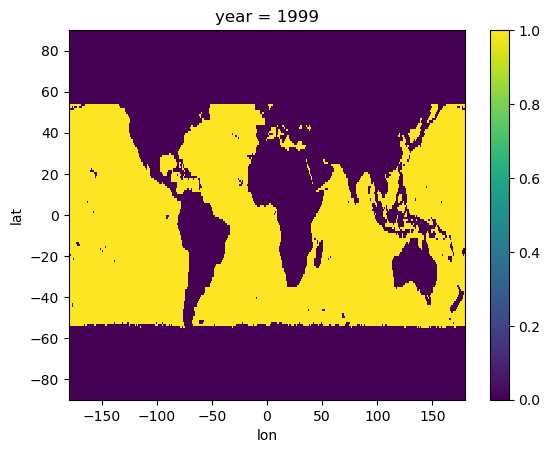

In [63]:
mask_ocean.plot()

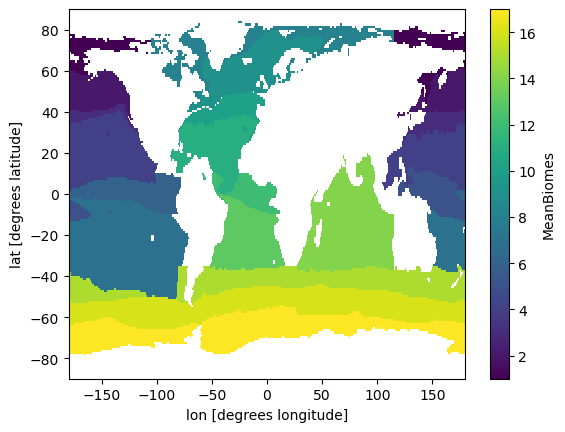

In [64]:
biomes.MeanBiomes.plot()

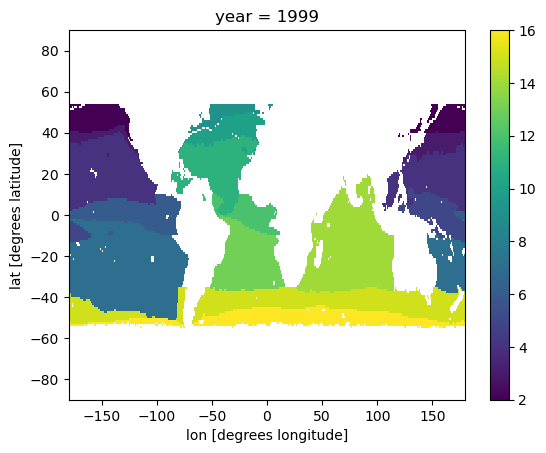

In [65]:
b = (biomes.MeanBiomes * mask_ocean).where(biomes.MeanBiomes * mask_ocean > 0)
b.plot()

# Seasonal Cycle: Climatology and Variance #

In [66]:
ds_list = [
           'obs',
           'asm_em',
           'hnd_em',
           'sim_em'
          ]

dict_color = { 'obs'    : obs_dict_chl['color'],
               'asm_em' : asm_dict_chl['color'],
               'hnd_em' : hnd_dict_chl['color'],
               'sim_em' : sim_dict_chl['color'],
              }


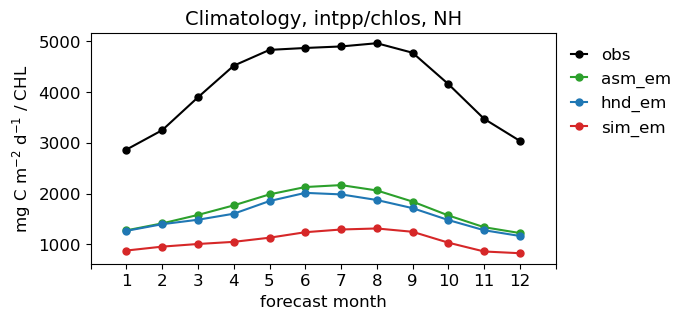

In [78]:


dict_to_show = {}
for ds in ds_list:
    dict_to_show[ds] = dict_clim_glbavg_NH[ds].sel(time=slice(0,11))
   
    
xlim_min = -1
xlim_max = 12
xticks_step = 1
    
file_out = f'ts_seasonal_cycle_climatology_basics'
title = f'Climatology, intpp/chlos, NH'
plot_ts_vs_lead(ds_list,        
              dict_to_show,
              color_dict=dict_color,
              ylim_min=None,
              ylim_max=None,
              xlim_min=xlim_min,
              xlim_max=xlim_max,
              xticks_step=xticks_step,
              xlabel='forecast month',
              ylabel=f'{units}',
              title=title,
              bbox=(.78,.5,.5,.5),
              fontsize=12,              
              dir_name=dir_out,
              file_name=file_out,
              show=True,
              save=True)

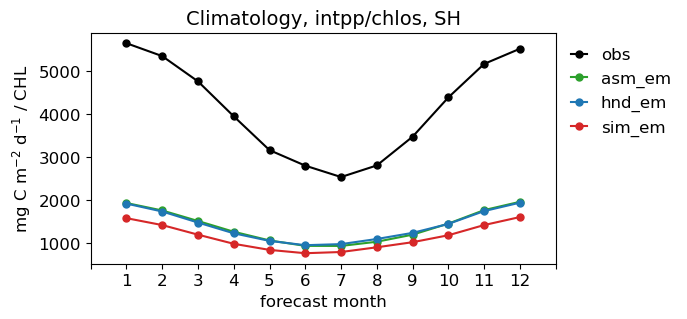

In [79]:
dict_to_show = {}
for ds in ds_list:
    dict_to_show[ds] = dict_clim_glbavg_SH[ds].sel(time=slice(0,11))
   
    
xlim_min = -1
xlim_max = 12
xticks_step = 1
    
file_out = f'ts_seasonal_cycle_climatology_basics'
title = f'Climatology, intpp/chlos, SH'
plot_ts_vs_lead(ds_list,        
              dict_to_show,
              color_dict=dict_color,
              ylim_min=None,
              ylim_max=None,
              xlim_min=xlim_min,
              xlim_max=xlim_max,
              xticks_step=xticks_step,
              xlabel='forecast month',
              ylabel=f'{units}',
              title=title,
              bbox=(.78,.5,.5,.5),
              fontsize=12,              
              dir_name=dir_out,
              file_name=file_out,
              show=True,
              save=True)

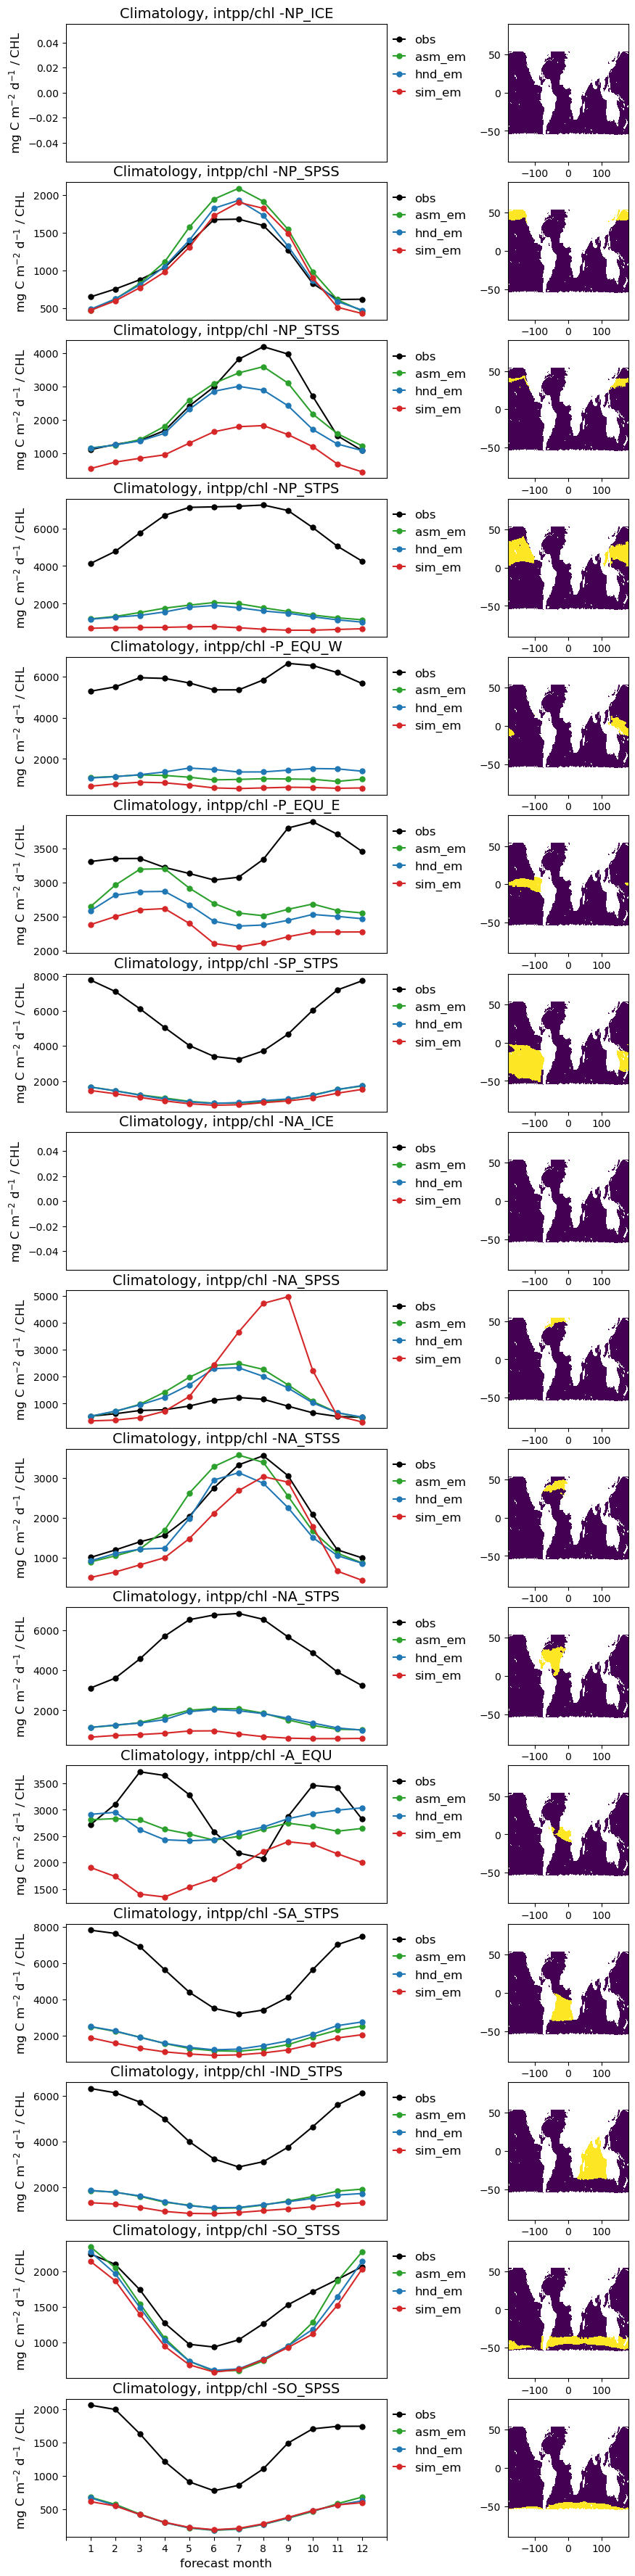

In [80]:
dict_to_show = {}
for bms_label in bms_labels:
    dict_to_show[bms_label] = {}
    for ds in ds_list:
        dict_to_show[bms_label][ds] = dict_clim_avg_biomes[bms_label][ds].sel(time=slice(0,11))
   
    
xlim_min = -1
xlim_max = 12
xticks_step = 1
    
file_out = f'ts_seasonal_cycle_climatology_basics'
title = f'Climatology, intpp/chl '
plot_ts_vs_lead_biomes(ds_list,        
              dict_to_show,
              biomes = biomes.MeanBiomes * mask_ocean.where(mask_ocean>0),
              bms_labels=bms_labels,
              color_dict=dict_color,
              xlim_min=xlim_min,
              xlim_max=xlim_max,
              figsize= (10,45),
              xticks_step=xticks_step,
              xlabel='forecast month',
              ylabel=f'{units}',
              title=title,
              bbox=(.78,.5,.5,.5),
              fontsize=12,              
              dir_name=dir_out,
              file_name=file_out,
              show=True,
              save=True)

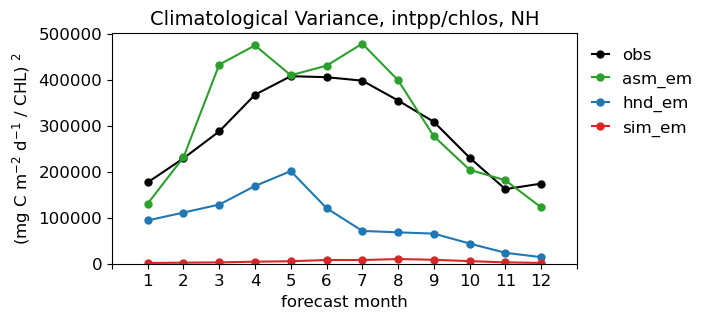

In [83]:
ds_list = [
           'obs',
           'asm_em',
           'hnd_em',
        #    'hnd',
           'sim_em'
          ]

dict_color = { 'obs'    : obs_dict_chl['color'],
               'asm_em' : asm_dict_chl['color'],
               'hnd_em' : hnd_dict_chl['color'],
            #    'hnd'    : "tab:orange",
               'sim_em' : sim_dict_chl['color'],
              }


dict_to_show = {}
for ds in ds_list:
    dict_to_show[ds] = dict_var_glbavg_NH[ds].sel(time=slice(0,11))
xlim_min = -1
xlim_max = 12
xticks_step = 1

file_out = f'ts_seasonal_cycle_climatology_basics'
title = f'Climatological Variance, intpp/chlos, NH'
plot_ts_vs_lead(ds_list,        
              dict_to_show,
              color_dict=dict_color,
              ylim_min=0,
              ylim_max=None,
              xlim_min=xlim_min,
              xlim_max=xlim_max,
              xticks_step=xticks_step,
              xlabel='forecast month',
              ylabel=f'({units}) $^{2}$',
              title=title,
              bbox=(.78,.5,.5,.5),
              fontsize=12,              
              dir_name=dir_out,
              file_name=file_out,
              show=True,
              save=False)

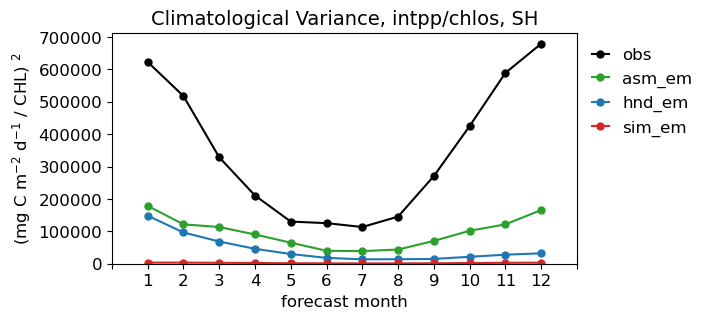

In [84]:
dict_to_show = {}
for ds in ds_list:
    dict_to_show[ds] = dict_var_glbavg_SH[ds].sel(time=slice(0,11))
xlim_min = -1
xlim_max = 12
xticks_step = 1

file_out = f'ts_seasonal_cycle_climatology_basics'
title = f'Climatological Variance, intpp/chlos, SH'
plot_ts_vs_lead(ds_list,        
              dict_to_show,
              color_dict=dict_color,
              ylim_min=0,
              ylim_max=None,
              xlim_min=xlim_min,
              xlim_max=xlim_max,
              xticks_step=xticks_step,
              xlabel='forecast month',
              ylabel=f'({units}) $^{2}$',
              title=title,
              bbox=(.78,.5,.5,.5),
              fontsize=12,              
              dir_name=dir_out,
              file_name=file_out,
              show=True,
              save=False)

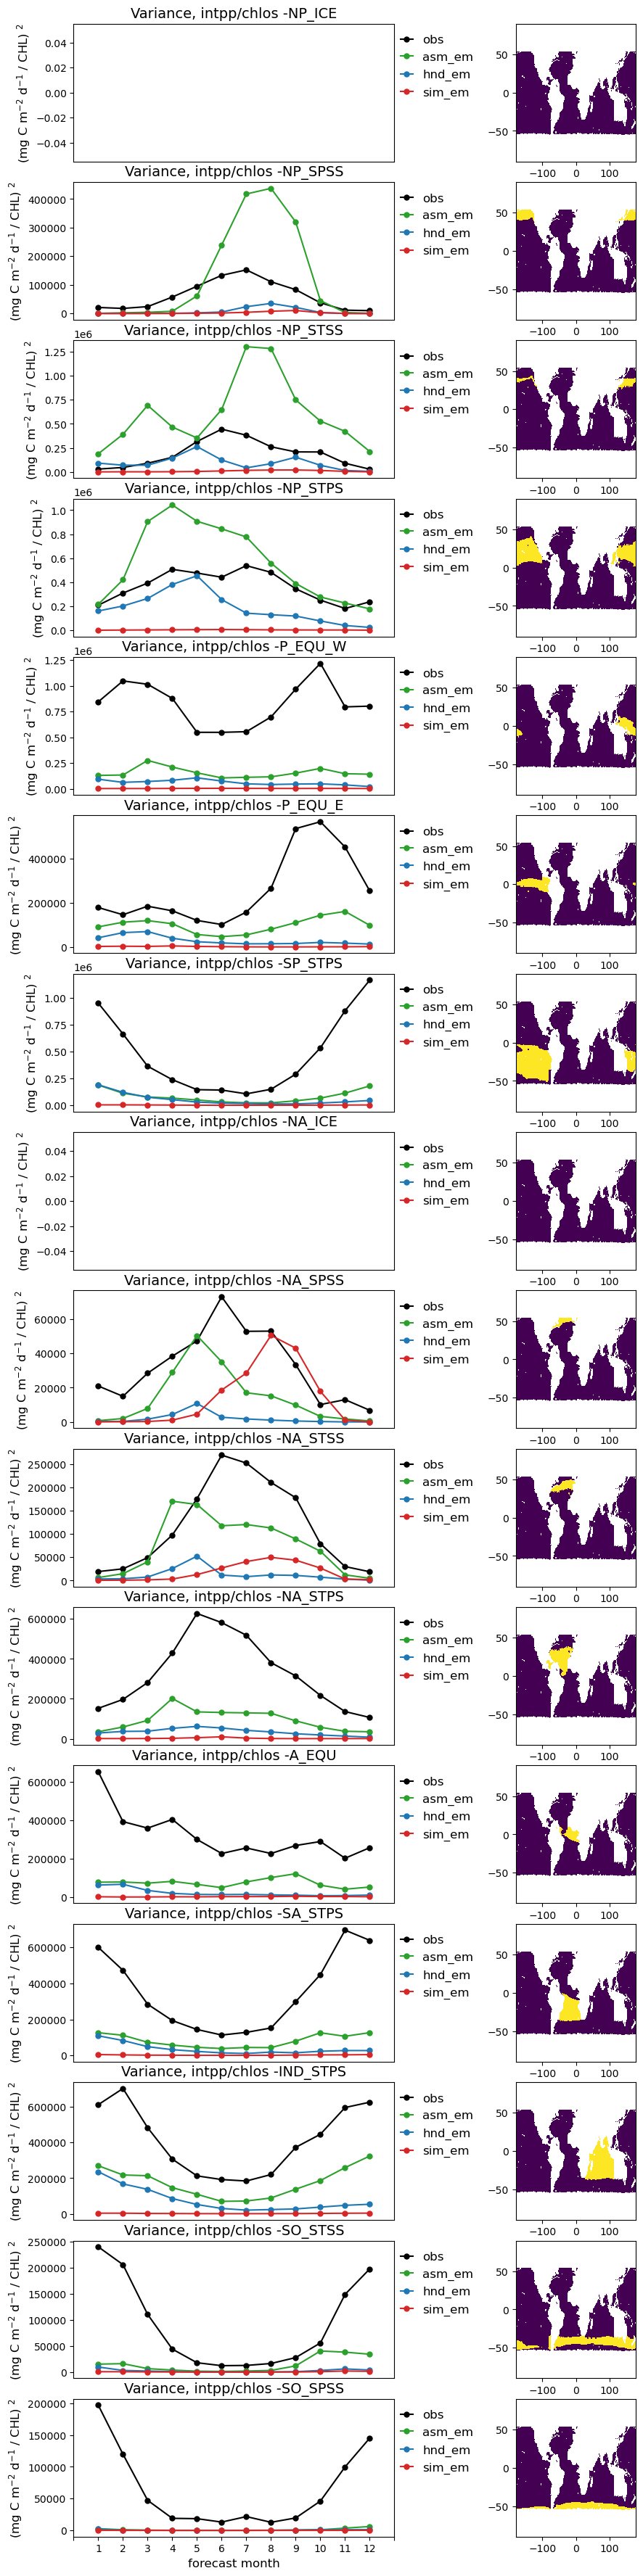

In [85]:
dict_to_show = {}
for bms_label in bms_labels:
    dict_to_show[bms_label] = {}
    for ds in ds_list:
        dict_to_show[bms_label][ds] = dict_var_avg_biomes[bms_label][ds].sel(time=slice(0,11))
   
    
xlim_min = -1
xlim_max = 12
xticks_step = 1
    
file_out = f'ts_seasonal_cycle_var_basics'
title = f'Variance, intpp/chlos '
plot_ts_vs_lead_biomes(ds_list,        
              dict_to_show,
              biomes = biomes.MeanBiomes * mask_ocean.where(mask_ocean>0),
              bms_labels=bms_labels,
              color_dict=dict_color,
              xlim_min=xlim_min,
              xlim_max=xlim_max,
              figsize= (10,45),
              xticks_step=xticks_step,
              xlabel='forecast month',
              ylabel=f'({units}) $^{2}$',
              title=title,
              bbox=(.78,.5,.5,.5),
              fontsize=12,              
              dir_name=dir_out,
              file_name=file_out,
              show=True,
              save=True)

# Maps #

init year starts: 2002
init year ends  : 2006
ave lead years  : 1 to 1
JFM:[0, 1, 2]
AMJ:[3, 4, 5]
JAS:[6, 7, 8]
OND:[9, 10, 11]
ANN:[ 0  1  2  3  4  5  6  7  8  9 10 11]


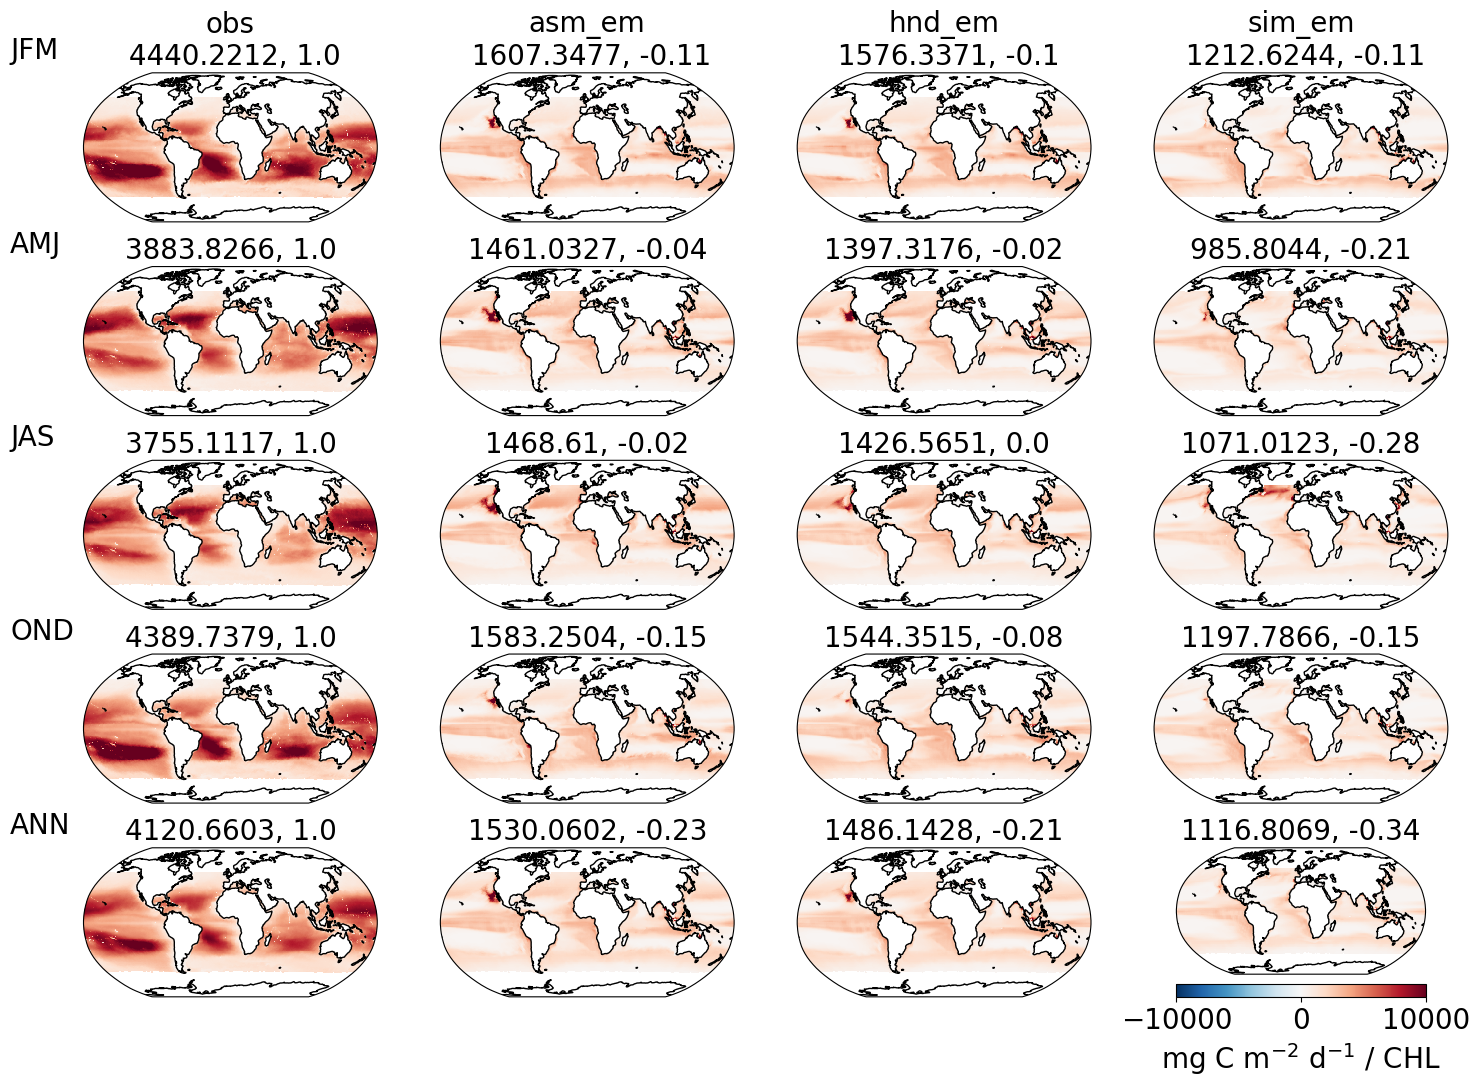

In [90]:
## Full field

show = True

dict_to_show = { 
                    'obs'    : ddata_em_after['obs'].sel(year=slice(y0_show,
                                                               y1_show)),
                    'asm_em' : ddata_em_after['asm_em'].sel(year=slice(y0_show,
                                                                  y1_show)),
                    'hnd_em' : ddata_em_after['hnd_em'].sel(year=slice(y0_show,
                                                                  y1_show)),
                    'sim_em' : ddata_em_after['sim_em'].sel(year=slice(y0_show,
                                                                  y1_show))
               }

ldyr_ini=1-1
ldyr_end=2-1
file_out = f'Maps_base_{y0_base}-{y1_base}_ldyr_{ldyr_ini}-{ldyr_end}_{y0_show}-{y1_show}'

if show:
    plot_composites([
                                   'obs',
                                   'asm_em',
                                   'hnd_em',
                                   'sim_em'
                ],
                dict_to_show,     
                figsize=(18,12),           
                central_longitude=0,
                ldyr_ini=ldyr_ini,
                ldyr_end=ldyr_end,
                vmax=10000,
                vmin=-10000,
                dir_name=dir_out,
                file_name=file_out,
                save=False,
                 mask = mask_ocean,
                 cbar_label = units)

init year starts: 2002
init year ends  : 2006
ave lead years  : 1 to 1


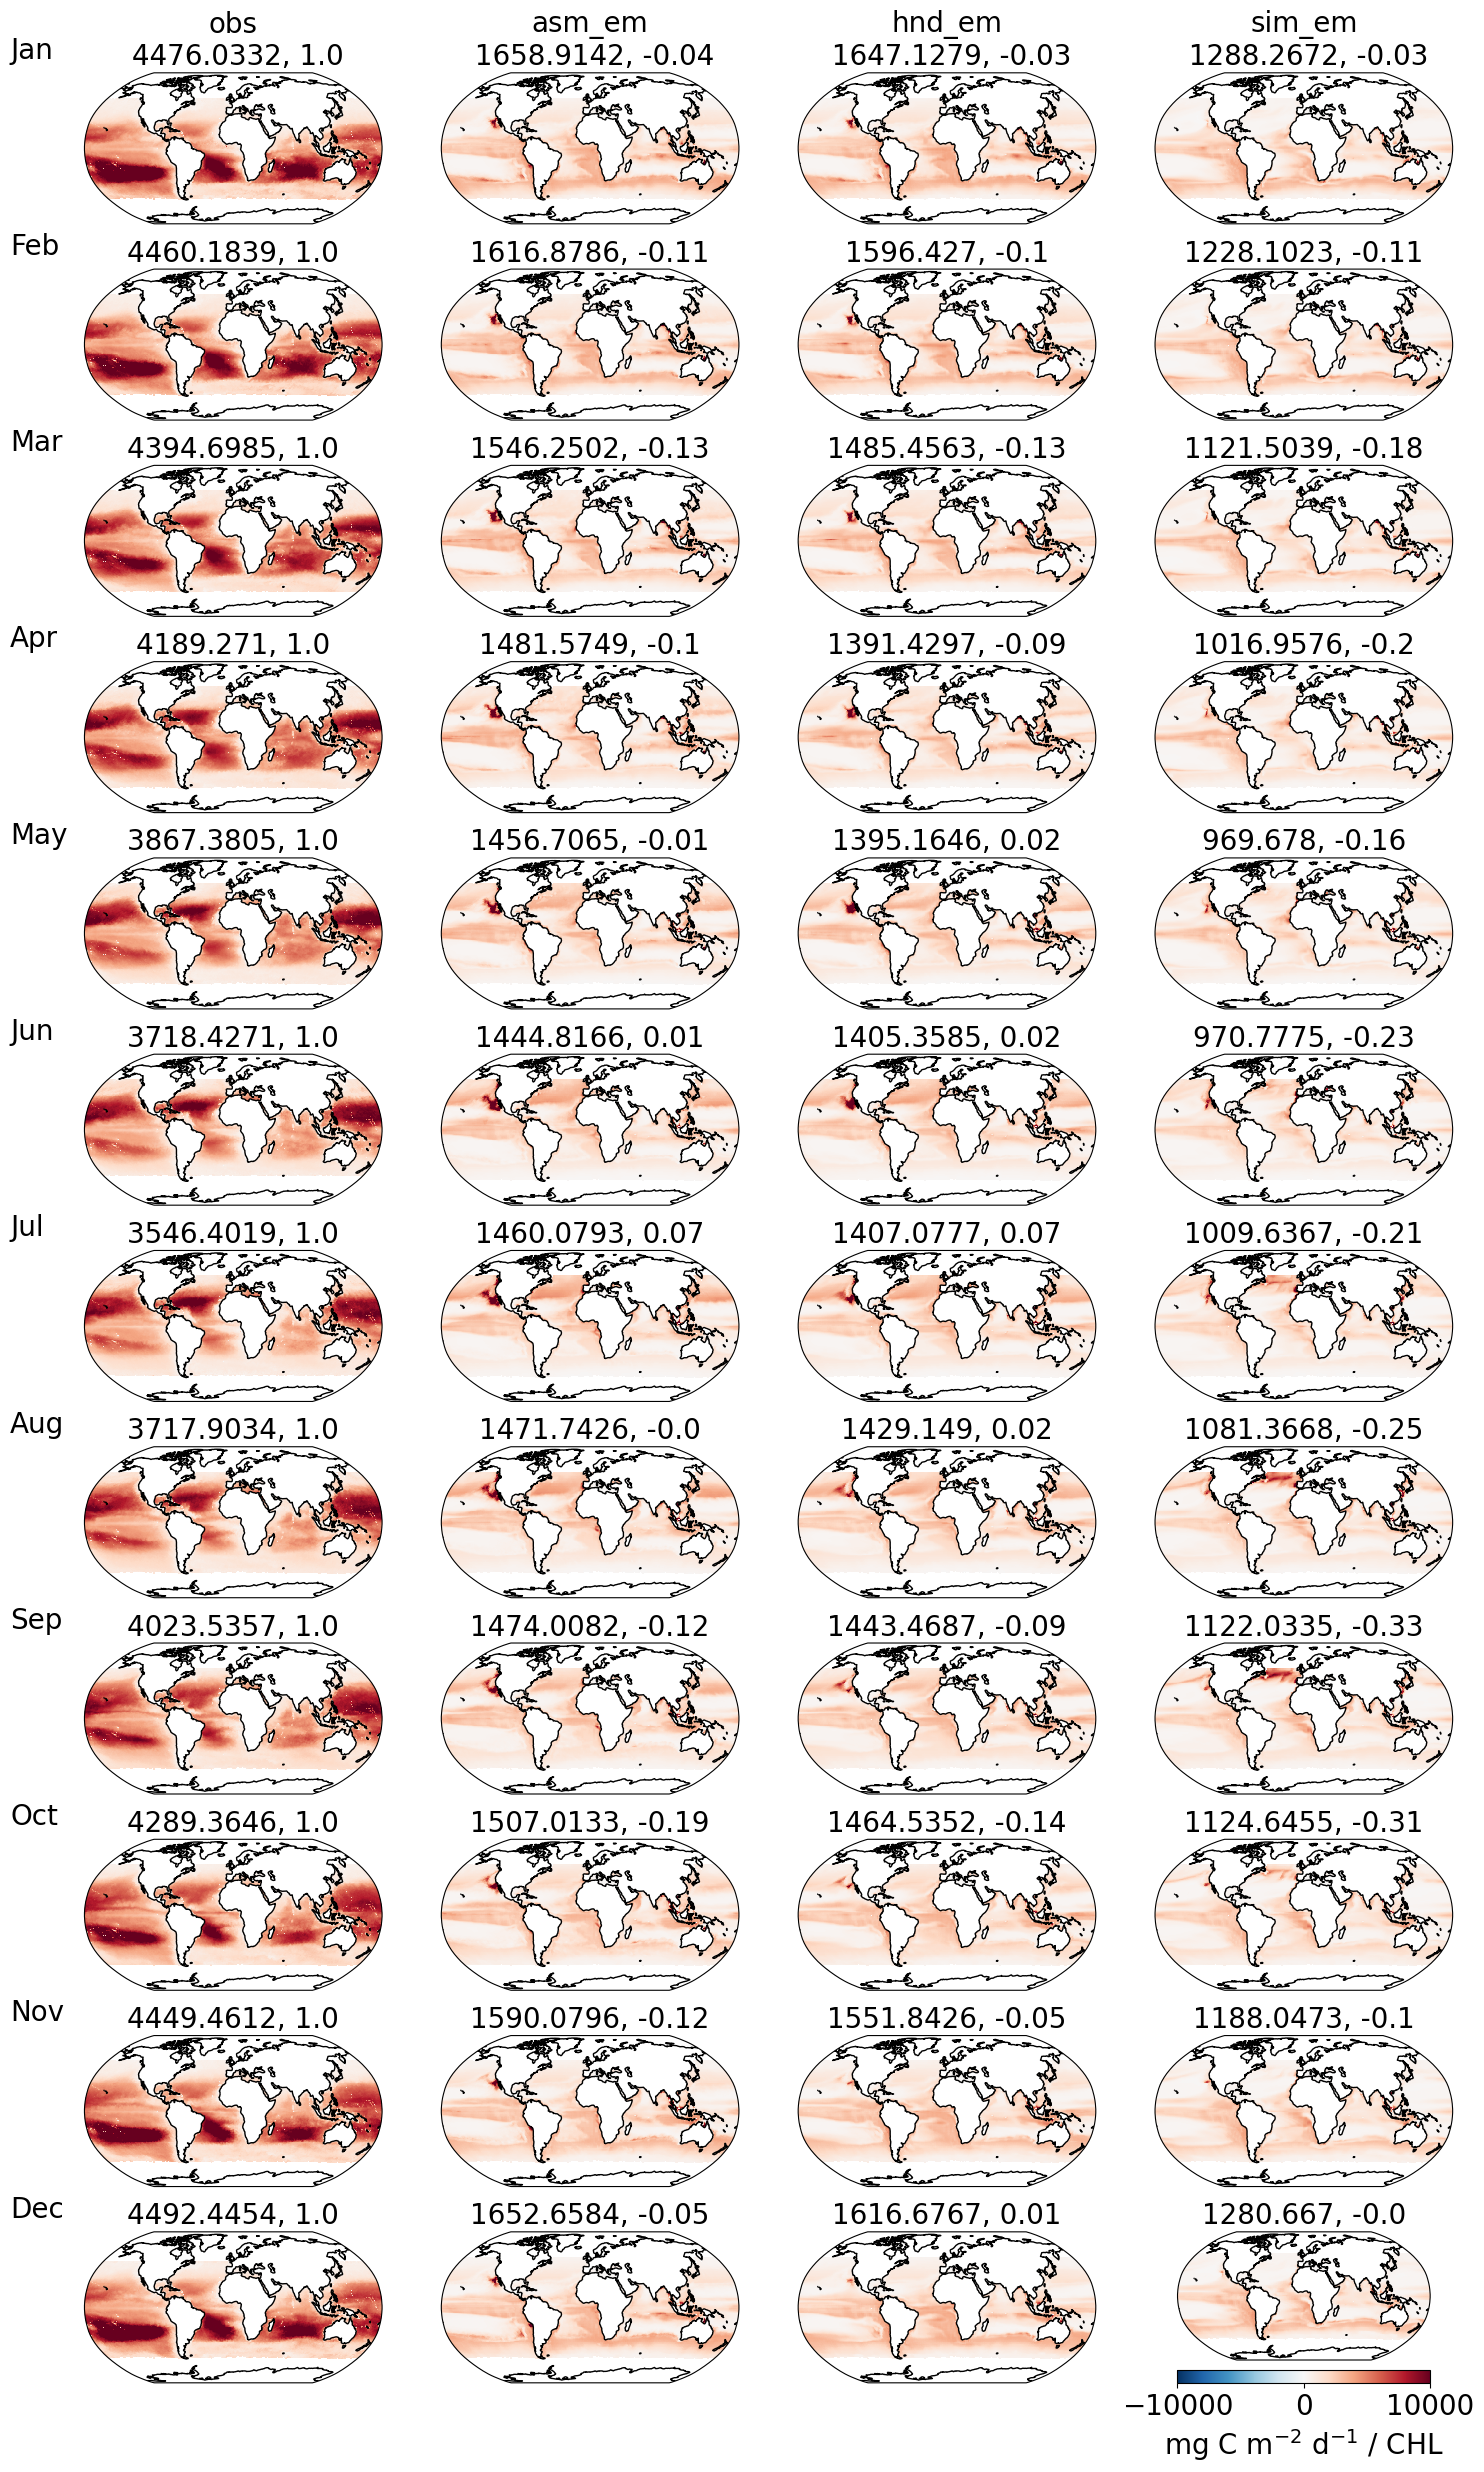

In [91]:
## Full field

show = True

dict_to_show = { 
                    'obs'    : ddata_em_after['obs'].sel(year=slice(y0_show,
                                                               y1_show)),
                    'asm_em' : ddata_em_after['asm_em'].sel(year=slice(y0_show,
                                                                  y1_show)),
                    'hnd_em' : ddata_em_after['hnd_em'].sel(year=slice(y0_show,
                                                                  y1_show)),
                    'sim_em' : ddata_em_after['sim_em'].sel(year=slice(y0_show,
                                                                  y1_show))
               }

ldyr_ini=1-1
ldyr_end=2-1
file_out = f'Maps_base_{y0_base}-{y1_base}_ldyr_{ldyr_ini}-{ldyr_end}_{y0_show}-{y1_show}'

if show:
    plot_composites([
                                   'obs',
                                   'asm_em',
                                   'hnd_em',
                                   'sim_em'
                ],
                dict_to_show,     
                figsize=(18,30),           
                central_longitude=0,
                ldyr_ini=ldyr_ini,
                ldyr_end=ldyr_end,
                vmax=10000,
                vmin=-10000,
                dir_name=dir_out,
                file_name=file_out,
                save=False,
                individual_months=True,
                 mask = mask_ocean,
                 cbar_label = units)